# Pitch Analysis

Please submit a coherent, readable notebookthat walks Dhrumil and Aishi through the exploratory data analysis and regression analysis you've done in pursuit of your story.

This notebook should be clean and focused:

- move any code for data acquisition or scraping into it's own notebook with a name like `scraping.ipynb`
- move any code for data cleaning and maniupualtion into it's own notebook with a name like `cleaning.ipynb`
- you may even want to make a notebook called `scratchpad.ipynb` to keep your messy analysis, you can carefully move the relevant parts to `analysis.ipynb` and make sure it's written in such a way that Dhrumil and Aishi can follow your logic
    - add text to guide a reader through this notebook, you may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts.
- make sure `analysis.ipynb` runs (restart and run all cells) from top to bottom without errors


## Setup

This section contains our standard notebook setup, including Python and R Imports. You can zoom right past this! 


In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings


During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

R imports

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Python imports

In [5]:
# installs any python packages in requirements.txt
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [6]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Loading The Data

_Load the cleaned data here. You're welcome to load multiple dataframes if that makes sense._
- _What is each row? Make sure to explain if it's not obvious._
- _Make sure to mention any caveats of the data we need to be aware of._
- _Make mention of any methodological choices you made in `cleaning.ipynb` that you think are relevant._
- _Display a small chunk of the data with something like `df.head()` or df.sample(5)`, so that we have an idea of what we're working with._


In [7]:
# your code to load and display the data
df = pd.read_csv('num_vacant_storefronts_by_zipcode.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(10)

,ZIP CODE,vacant_storefronts,poverty_rate,unemployment_rate,median_household_income
0,10001,219,13.058315,3.621007,92840.0
1,10002,214,27.361762,3.350005,36982.0
2,10003,144,9.203464,3.144975,118161.0
3,10004,20,1.319340,2.895623,190223.0
4,10005,21,9.458683,2.819280,189702.0
5,10006,32,3.363519,4.320988,179044.0
6,10007,39,2.157399,1.406564,224063.0
7,10009,77,23.542547,2.538571,63717.0
8,10010,82,10.820694,2.558905,132988.0
9,10011,161,9.915664,2.752294,138272.0


Here, for each row, we have the number of vacant storefronts in each zipcode. We will use this data to analyze the relationship between the number of vacant storefronts and the socio-economic features of the neighborhood for New York City.

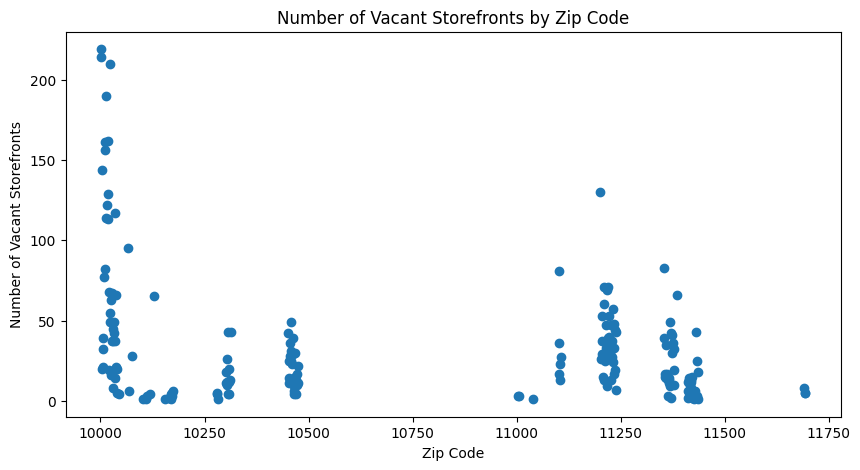

In [15]:
#plot a scatter plot of the data. plot all the zip codes on the x-axis and the number of vacant storefronts on the y-axis 

plt.figure(figsize=(10, 5))
plt.scatter(df['ZIP CODE'], df['vacant_storefronts'])
plt.xlabel('Zip Code')
plt.ylabel('Number of Vacant Storefronts')
plt.title('Number of Vacant Storefronts by Zip Code')
plt.show()

Here we come up with an hypothesis:

Null Hypothesis (H0): There is no relationship between the number of vacant storefronts and poverty rate, unemployment rate and the median household income in New York City neighborhoods (by zipcode).


Alternative Hypothesis (H1): There is a relationship between the number of vacant storefronts and poverty rate, unemployment rate and the median household income in New York City neighborhoods (by zipcode).



## Exploratory Analysis

_In the cells below, guide us through your exploratory data analysis. You may include charts and regressions as you see fit._


_You may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts. You can make a separate `scratchpad.ipynb` to store analysis that you were trying out but isn't ultimately relevant to your pitch. You don't need to rewrite your pitch here, but please make sure to include enough text for Dhrumil and Aishi to be able to follow your logic._

In [8]:
%%R

# Read the cleaned CSV file with quarters into a data frame
data <- read.csv("num_vacant_storefronts_by_zipcode.csv")


In [9]:
%%R
head(data)


  X ZIP.CODE vacant_storefronts poverty_rate unemployment_rate
1 0    10001                219    13.058315          3.621007
2 1    10002                214    27.361762          3.350005
3 2    10003                144     9.203464          3.144975
4 3    10004                 20     1.319340          2.895623
5 4    10005                 21     9.458683          2.819280
6 5    10006                 32     3.363519          4.320988
  median_household_income
1                   92840
2                   36982
3                  118161
4                  190223
5                  189702
6                  179044


In [10]:
%%R
colnames(data)

[1] "X"                       "ZIP.CODE"               
[3] "vacant_storefronts"      "poverty_rate"           
[5] "unemployment_rate"       "median_household_income"


In [11]:
%%R
#fit the linear model to see if there is a relationship between the number of vacant storefronts and the poverty rate in the zip code

lm1 <- lm(vacant_storefronts ~ poverty_rate, data=data)
summary(lm1)


Call:
lm(formula = vacant_storefronts ~ poverty_rate, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.198 -24.965 -10.689   6.077 182.126 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   38.4868     6.0644   6.346 1.83e-09 ***
poverty_rate  -0.1235     0.3309  -0.373    0.709    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.66 on 175 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.0007958,	Adjusted R-squared:  -0.004914 
F-statistic: 0.1394 on 1 and 175 DF,  p-value: 0.7094



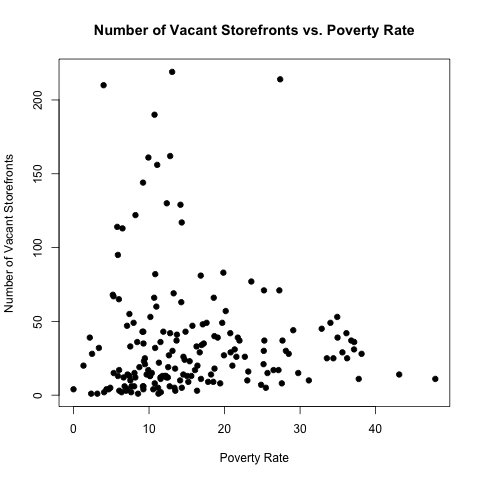

In [12]:
%%R
#plot the linear model

plot(data$poverty_rate, data$vacant_storefronts, main="Number of Vacant Storefronts vs. Poverty Rate", xlab="Poverty Rate", ylab="Number of Vacant Storefronts", pch=19)

`geom_smooth()` using formula = 'y ~ x'


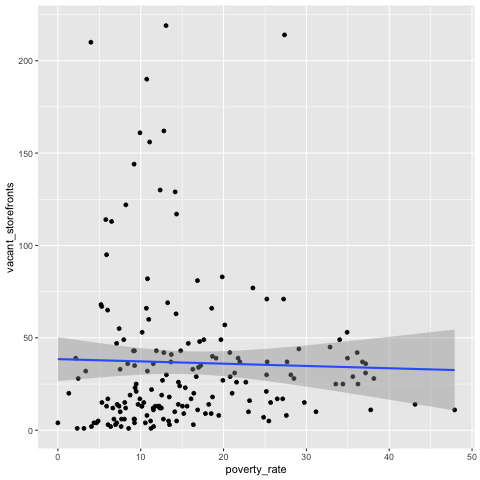

In [13]:
%%R

#make a scatter plot of the model using ggplot

ggplot(data, aes(x=poverty_rate, y=vacant_storefronts)) + geom_point() + geom_smooth(method=lm)

In [26]:
%%R

#make a scatter plot of the model using ggplot

ggplot(data, aes(x=poverty_rate, y=vacant_storefronts)) + geom_point() +theme_light() + geom_smooth(method=lm)
ggsave("povertyrate_final.svg")

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


In [28]:
%%R
#now fit a linear model to see if there is a relationship between the number of vacant storefronts and the unemployment rate in the zip code

lm2 <- lm(vacant_storefronts ~ unemployment_rate, data=data)
summary(lm2)



Call:
lm(formula = vacant_storefronts ~ unemployment_rate, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.035 -25.001  -8.392   8.238 181.686 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         53.035      7.714   6.875 1.05e-10 ***
unemployment_rate   -4.342      1.862  -2.332   0.0209 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 41.05 on 175 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.03013,	Adjusted R-squared:  0.02459 
F-statistic: 5.437 on 1 and 175 DF,  p-value: 0.02085



`geom_smooth()` using formula = 'y ~ x'


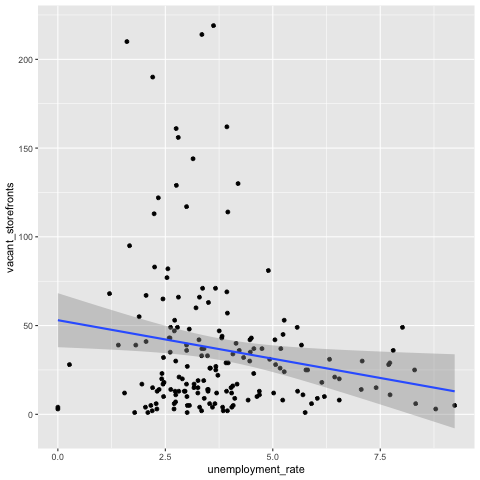

In [19]:
%%R
#plot the linear model using ggplot

ggplot(data, aes(x=unemployment_rate, y=vacant_storefronts)) + geom_point() + theme_light() +geom_smooth(method=lm)
ggsave("unemployment_final.svg")



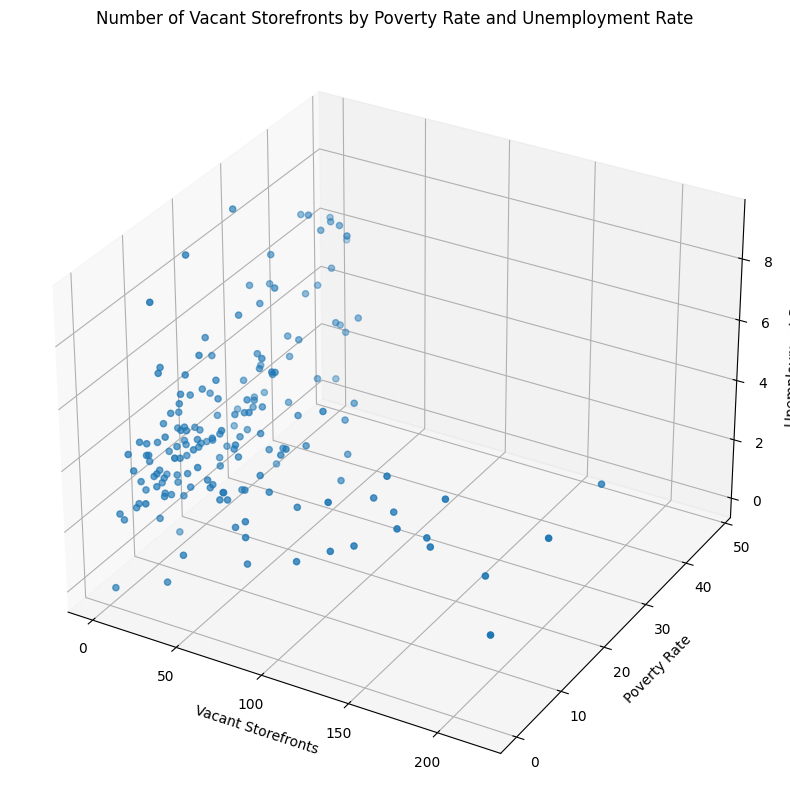

In [30]:
#plot a 3d scatter plot of the data.plot vacant strorefronts on the x axis, poverty rate on the y axis, and unemployment rate on the z axis

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['vacant_storefronts'], df['poverty_rate'], df['unemployment_rate'])
ax.set_xlabel('Vacant Storefronts')
ax.set_ylabel('Poverty Rate')
ax.set_zlabel('Unemployment Rate')
plt.title('Number of Vacant Storefronts by Poverty Rate and Unemployment Rate')
plt.show()


In [31]:
%%R
#fit a linear model to see if there is arelationship between the number of vacant storefronts and the poverty rate and median income in the zip code

lm3 <- lm(vacant_storefronts ~ median_household_income, data=data)
summary(lm3)


Call:
lm(formula = vacant_storefronts ~ median_household_income, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.742 -24.483  -9.234   5.269 182.266 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.673e+01  3.027e+00  12.135  < 2e-16 ***
median_household_income 4.911e-08  1.673e-08   2.936  0.00374 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.16 on 188 degrees of freedom
Multiple R-squared:  0.04384,	Adjusted R-squared:  0.03875 
F-statistic:  8.62 on 1 and 188 DF,  p-value: 0.003741



`geom_smooth()` using formula = 'y ~ x'


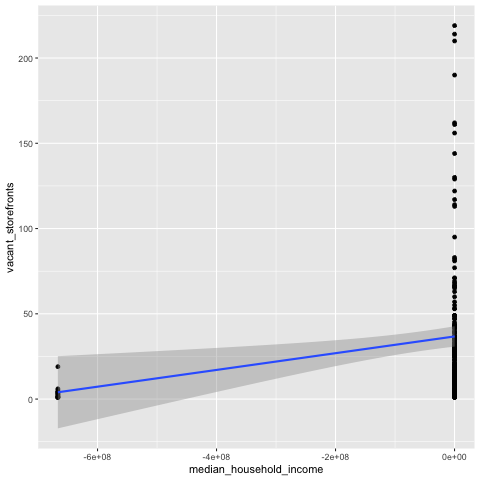

In [32]:
%%R
#plot the linear model using ggplot

ggplot(data, aes(x=median_household_income, y=vacant_storefronts)) + geom_point() + geom_smooth(method=lm)